In [63]:
from tools import *
from scraper import *
from data import *
from model import *
import pandas as pd
import time
import matplotlib.pyplot as plt


import numpy as np
import datetime as dt

In [65]:
llh = LinkLoadHandler()
taps = tapsHandler()

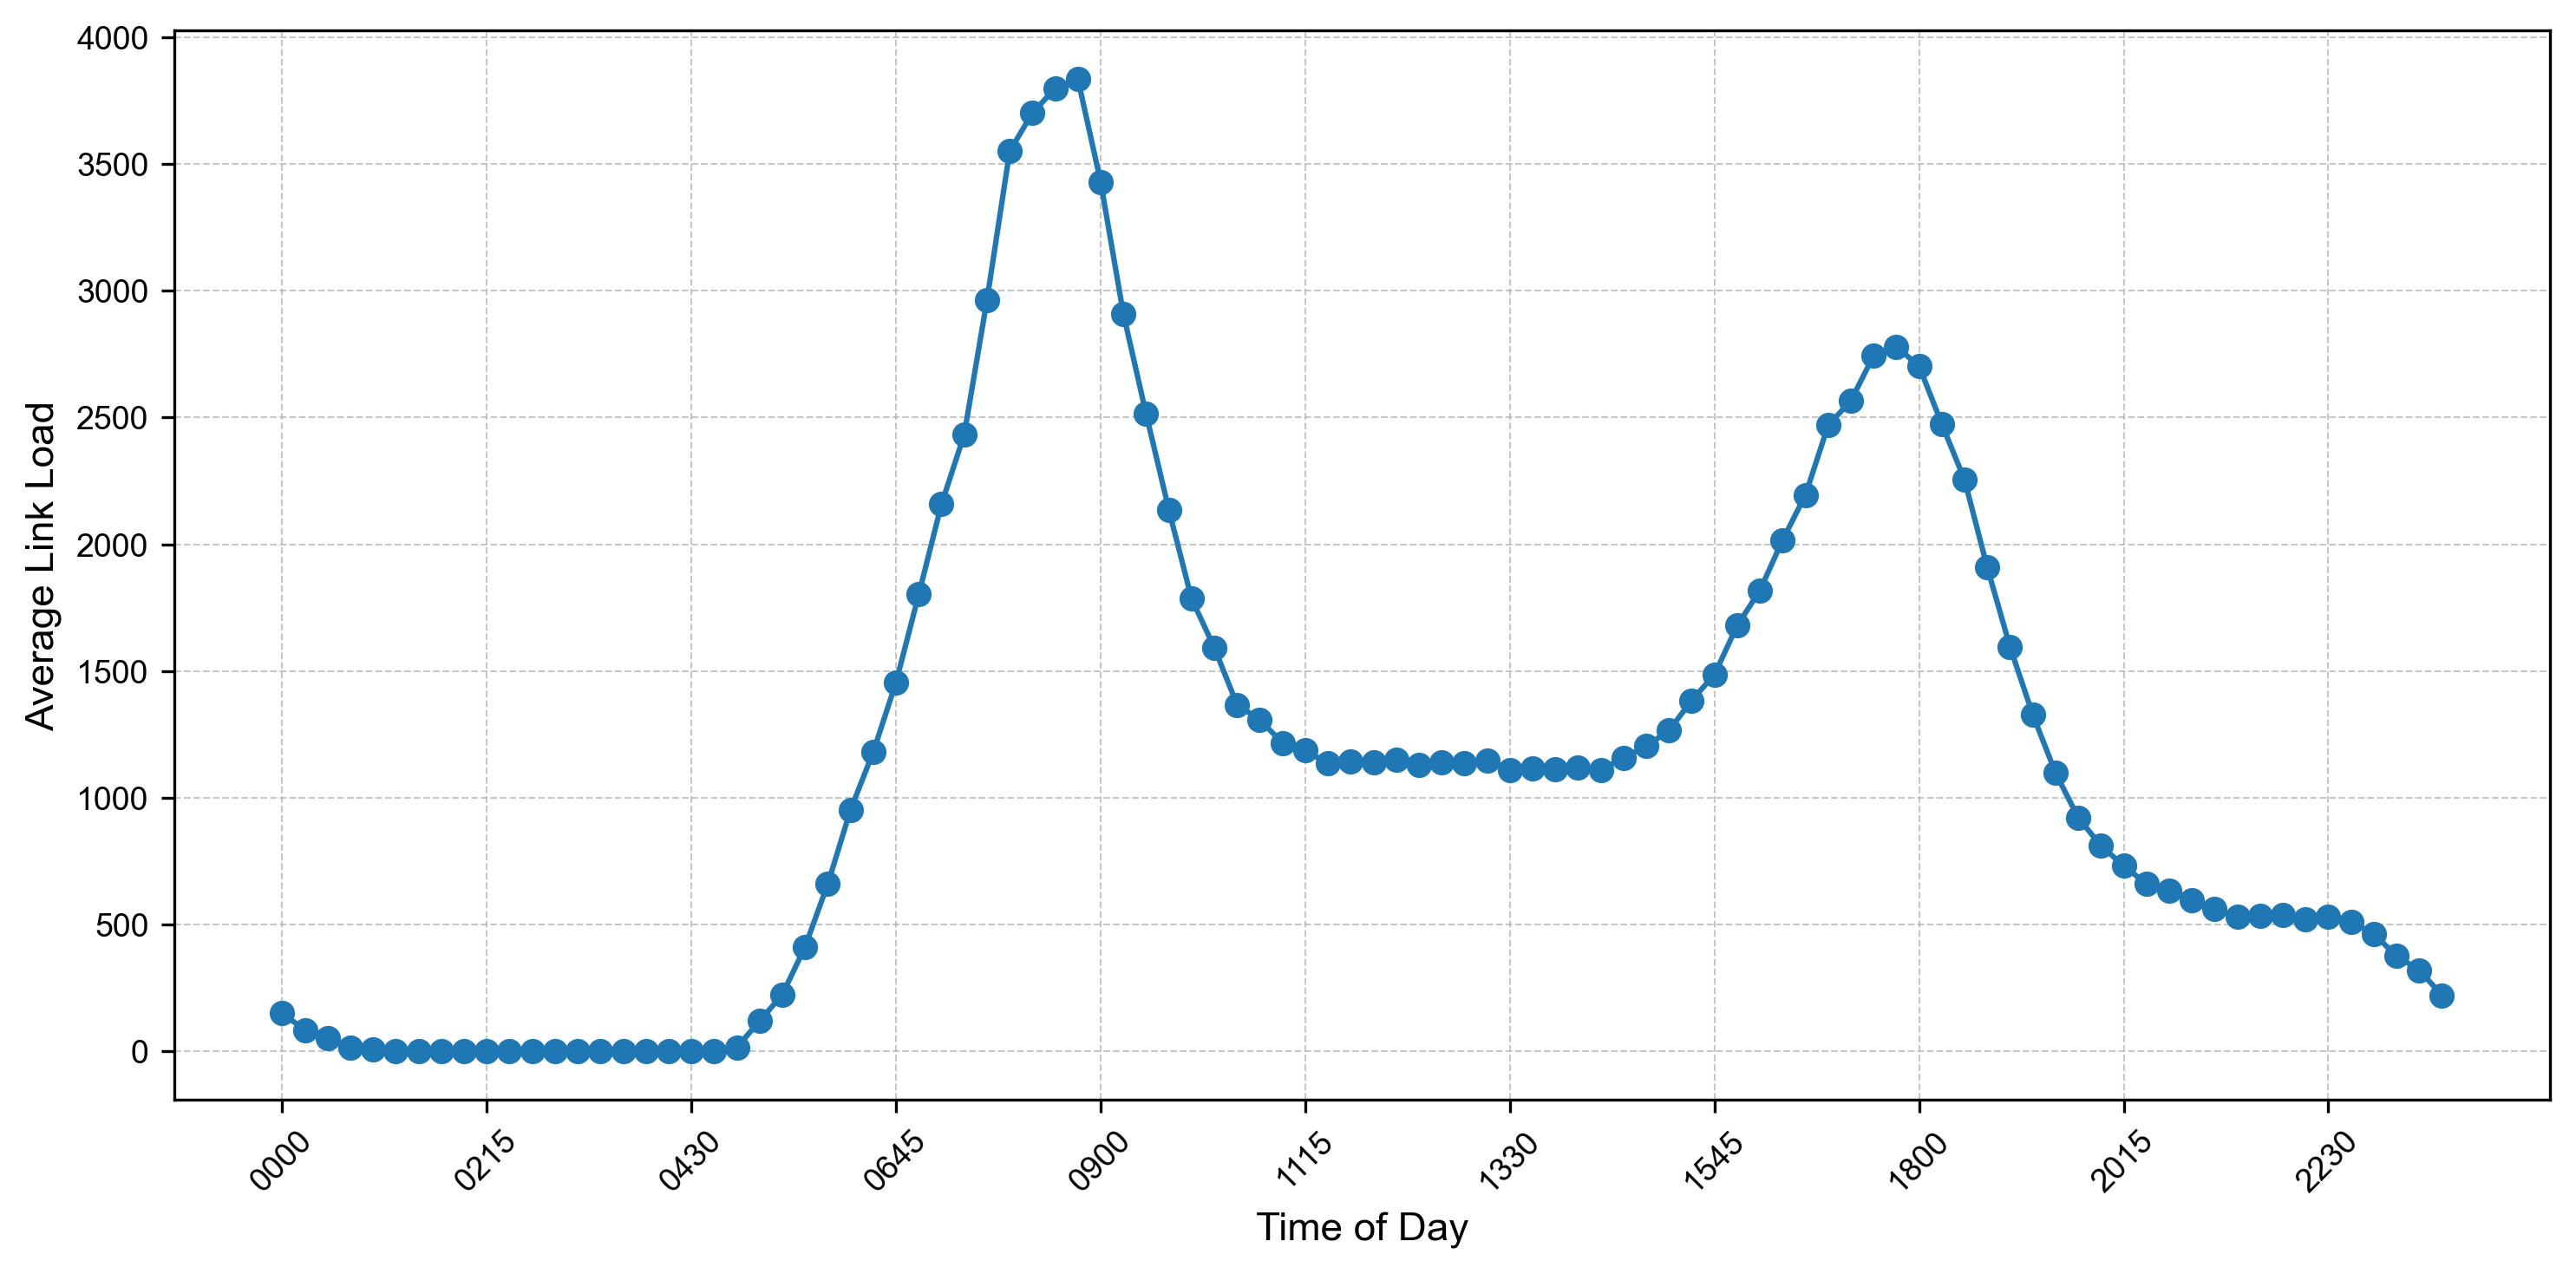

In [17]:
# plot the load 
tod = 'MTT'
start_station = 'Queensway'
end_station = 'Lancaster Gate'
year = '2019'
quarter_hours = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H%M')
loads = []
for quarter_hour in quarter_hours:
    # get the load for the quarter hour
    load = llh.get_avg_link_load(start_station, end_station, quarter_hour, tod, year)
    loads.append(load)
# plot the load
plt.figure(figsize=(10, 5), dpi=300)
plt.rcParams.update({
    'font.family': 'Arial',      # or 'serif'
    'font.size': 10,             # or 11, to match LaTeX
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})
plt.plot(quarter_hours, loads, marker='o')
#plt.title(f'Average Link Load from {start_station} to {end_station} on {year} {tod}')
plt.xlabel('Time of Day')
plt.ylabel('Average Link Load')
plt.xticks(ticks=range(0, len(quarter_hours), len(quarter_hours)//10), labels=quarter_hours[::len(quarter_hours)//10], rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # avoid label clipping
plt.savefig(f'plots/link_load_{start_station}_{end_station}_{year}_{tod}.png')
plt.show()

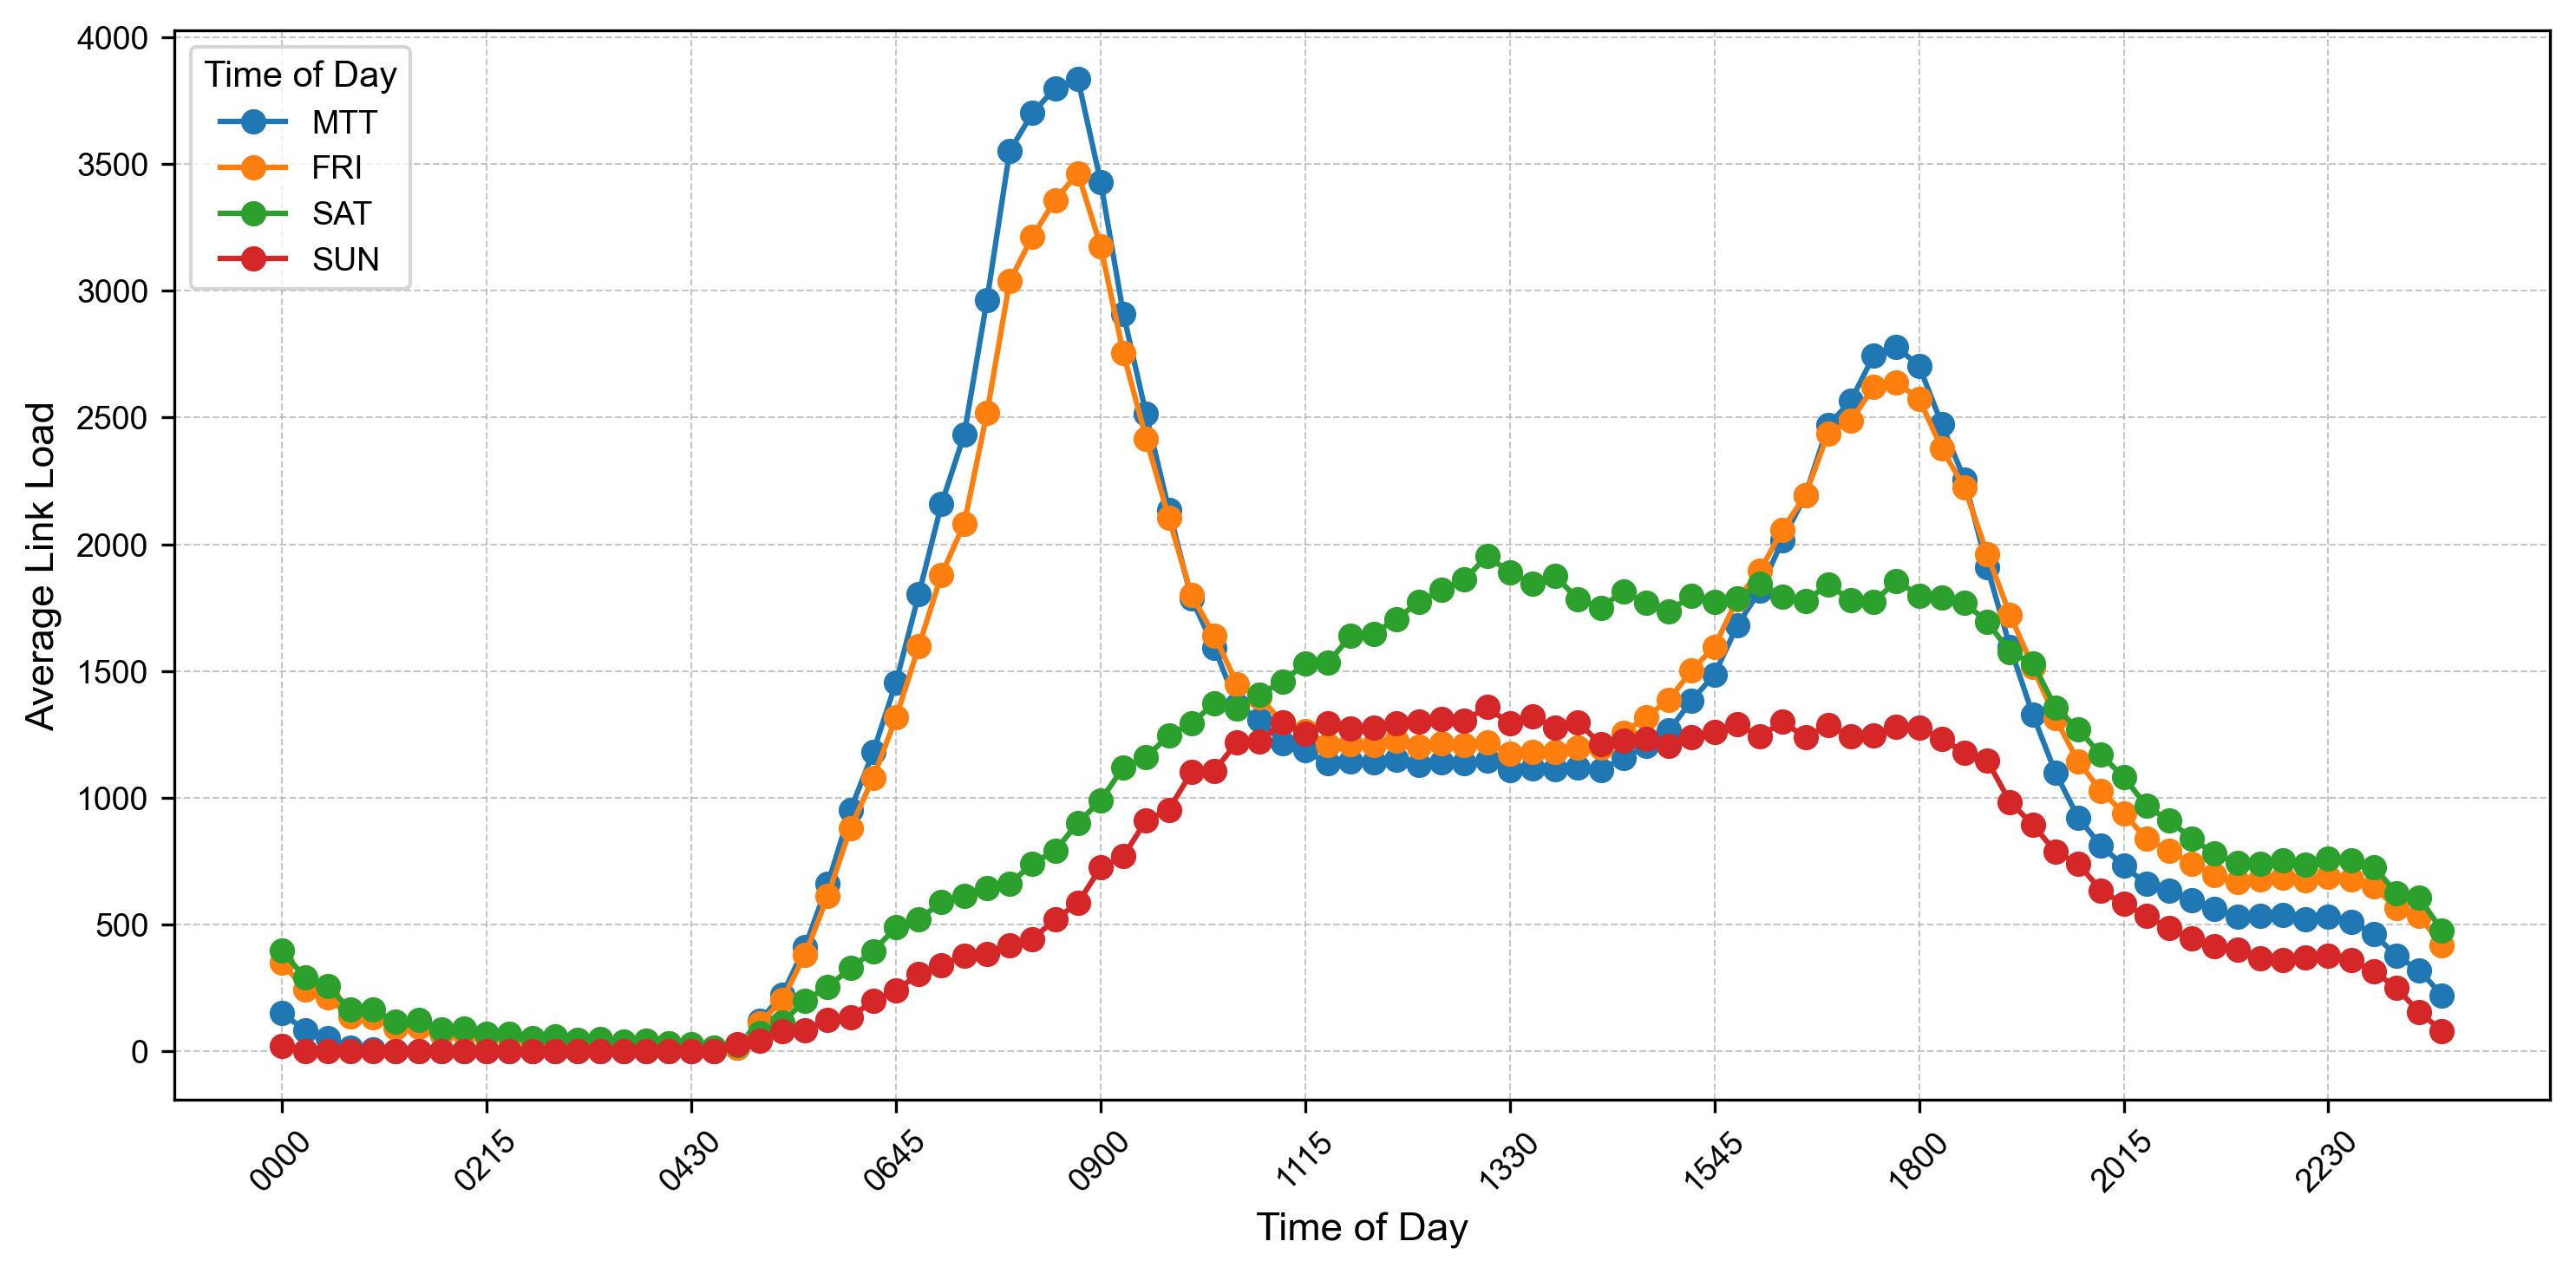

In [19]:
# plot the load 
tods = ['MTT', 'FRI', 'SAT', 'SUN']
start_station = 'Queensway'
end_station = 'Lancaster Gate'
year = '2019'
quarter_hours = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H%M')

# plot the load
plt.figure(figsize=(10, 5), dpi=300)
plt.rcParams.update({
    'font.family': 'Arial',      # or 'serif'
    'font.size': 10,             # or 11, to match LaTeX
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})
for tod in tods:
    loads = []
    for quarter_hour in quarter_hours:
        # get the load for the quarter hour
        load = llh.get_avg_link_load(start_station, end_station, quarter_hour, tod, year)
        loads.append(load)
    # plot the load
    plt.plot(quarter_hours, loads, marker='o', label=tod)

#plt.title(f'Average Link Load from {start_station} to {end_station} on {year} {tod}')
plt.xlabel('Time of Day')
plt.ylabel('Average Link Load')
plt.legend(title='Time of Day', loc='upper left')
plt.xticks(ticks=range(0, len(quarter_hours), len(quarter_hours)//10), labels=quarter_hours[::len(quarter_hours)//10], rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # avoid label clipping
plt.savefig(f'plots/link_load_{start_station}_{end_station}_{year}_ALL.png')
plt.show()

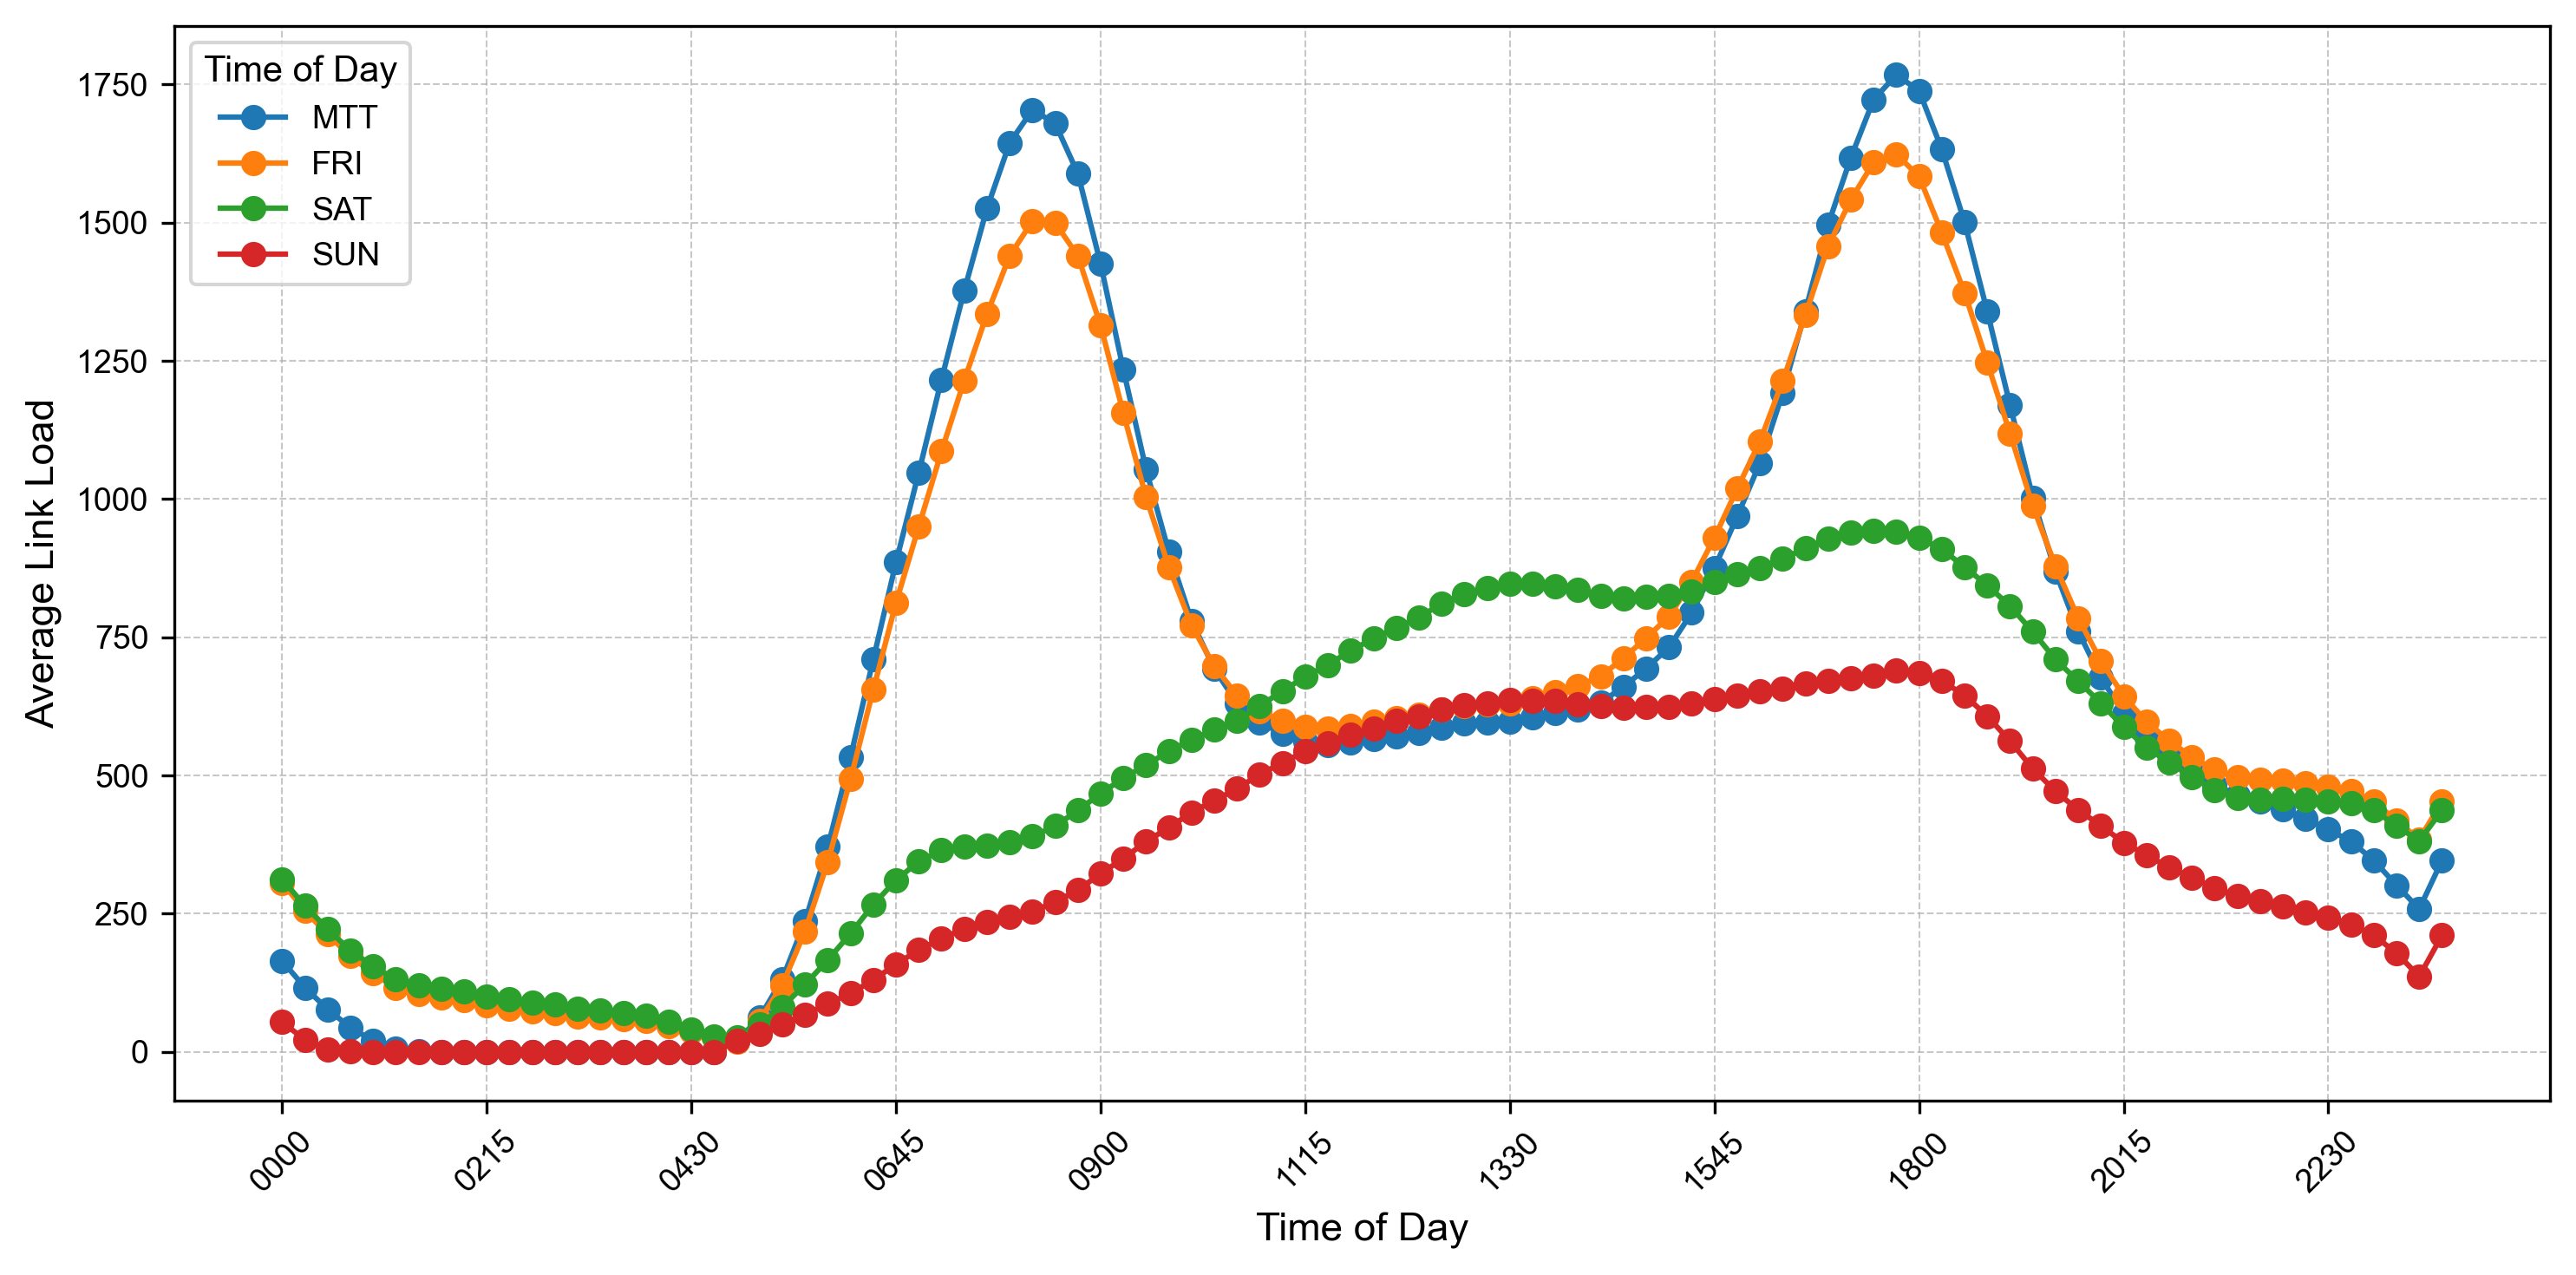

In [39]:
# plot the load averaged OVER ALL LINKS
tods = ['MTT', 'FRI', 'SAT', 'SUN']
stations = llh.get_all_stations()
directions = ['EB', 'WB']
year = '2019'
quarter_hours = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H%M').to_list()
quarter_hours[-1] = '2345-0000'

# plot the load
plt.figure(figsize=(10, 5), dpi=300)
plt.rcParams.update({
    'font.family': 'Arial',      # or 'serif'
    'font.size': 10,             # or 11, to match LaTeX
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})
for tod in tods:
    loads = []
    for quarter_hour in quarter_hours:
        qh = llh.get_quaterhour(quarter_hour)
        df = llh.dfs[year][tod][qh].apply(lambda x: int(x.replace('\u202f', '').replace(' ', '')) if isinstance(x, str) else x)
        #print(qh, df.mean())
        loads.append(df.mean())
    plt.plot(quarter_hours, loads, marker='o', label=tod)
#plt.title(f'Average Link Load from {start_station} to {end_station} on {year} {tod}')
plt.xlabel('Time of Day')
plt.ylabel('Average Link Load')
plt.legend(title='Time of Day', loc='upper left')
plt.xticks(ticks=range(0, len(quarter_hours), len(quarter_hours)//10), labels=quarter_hours[::len(quarter_hours)//10], rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # avoid label clipping
plt.savefig(f'plots/link_load_evolution_{year}_ALL.png')
plt.show()

In [42]:
ret, found = taps.get_entries_exits("Notting Hill Gate", "02/01/2022")
print(found)
print(ret)

True
{'entries': 5435, 'exits': 5755}


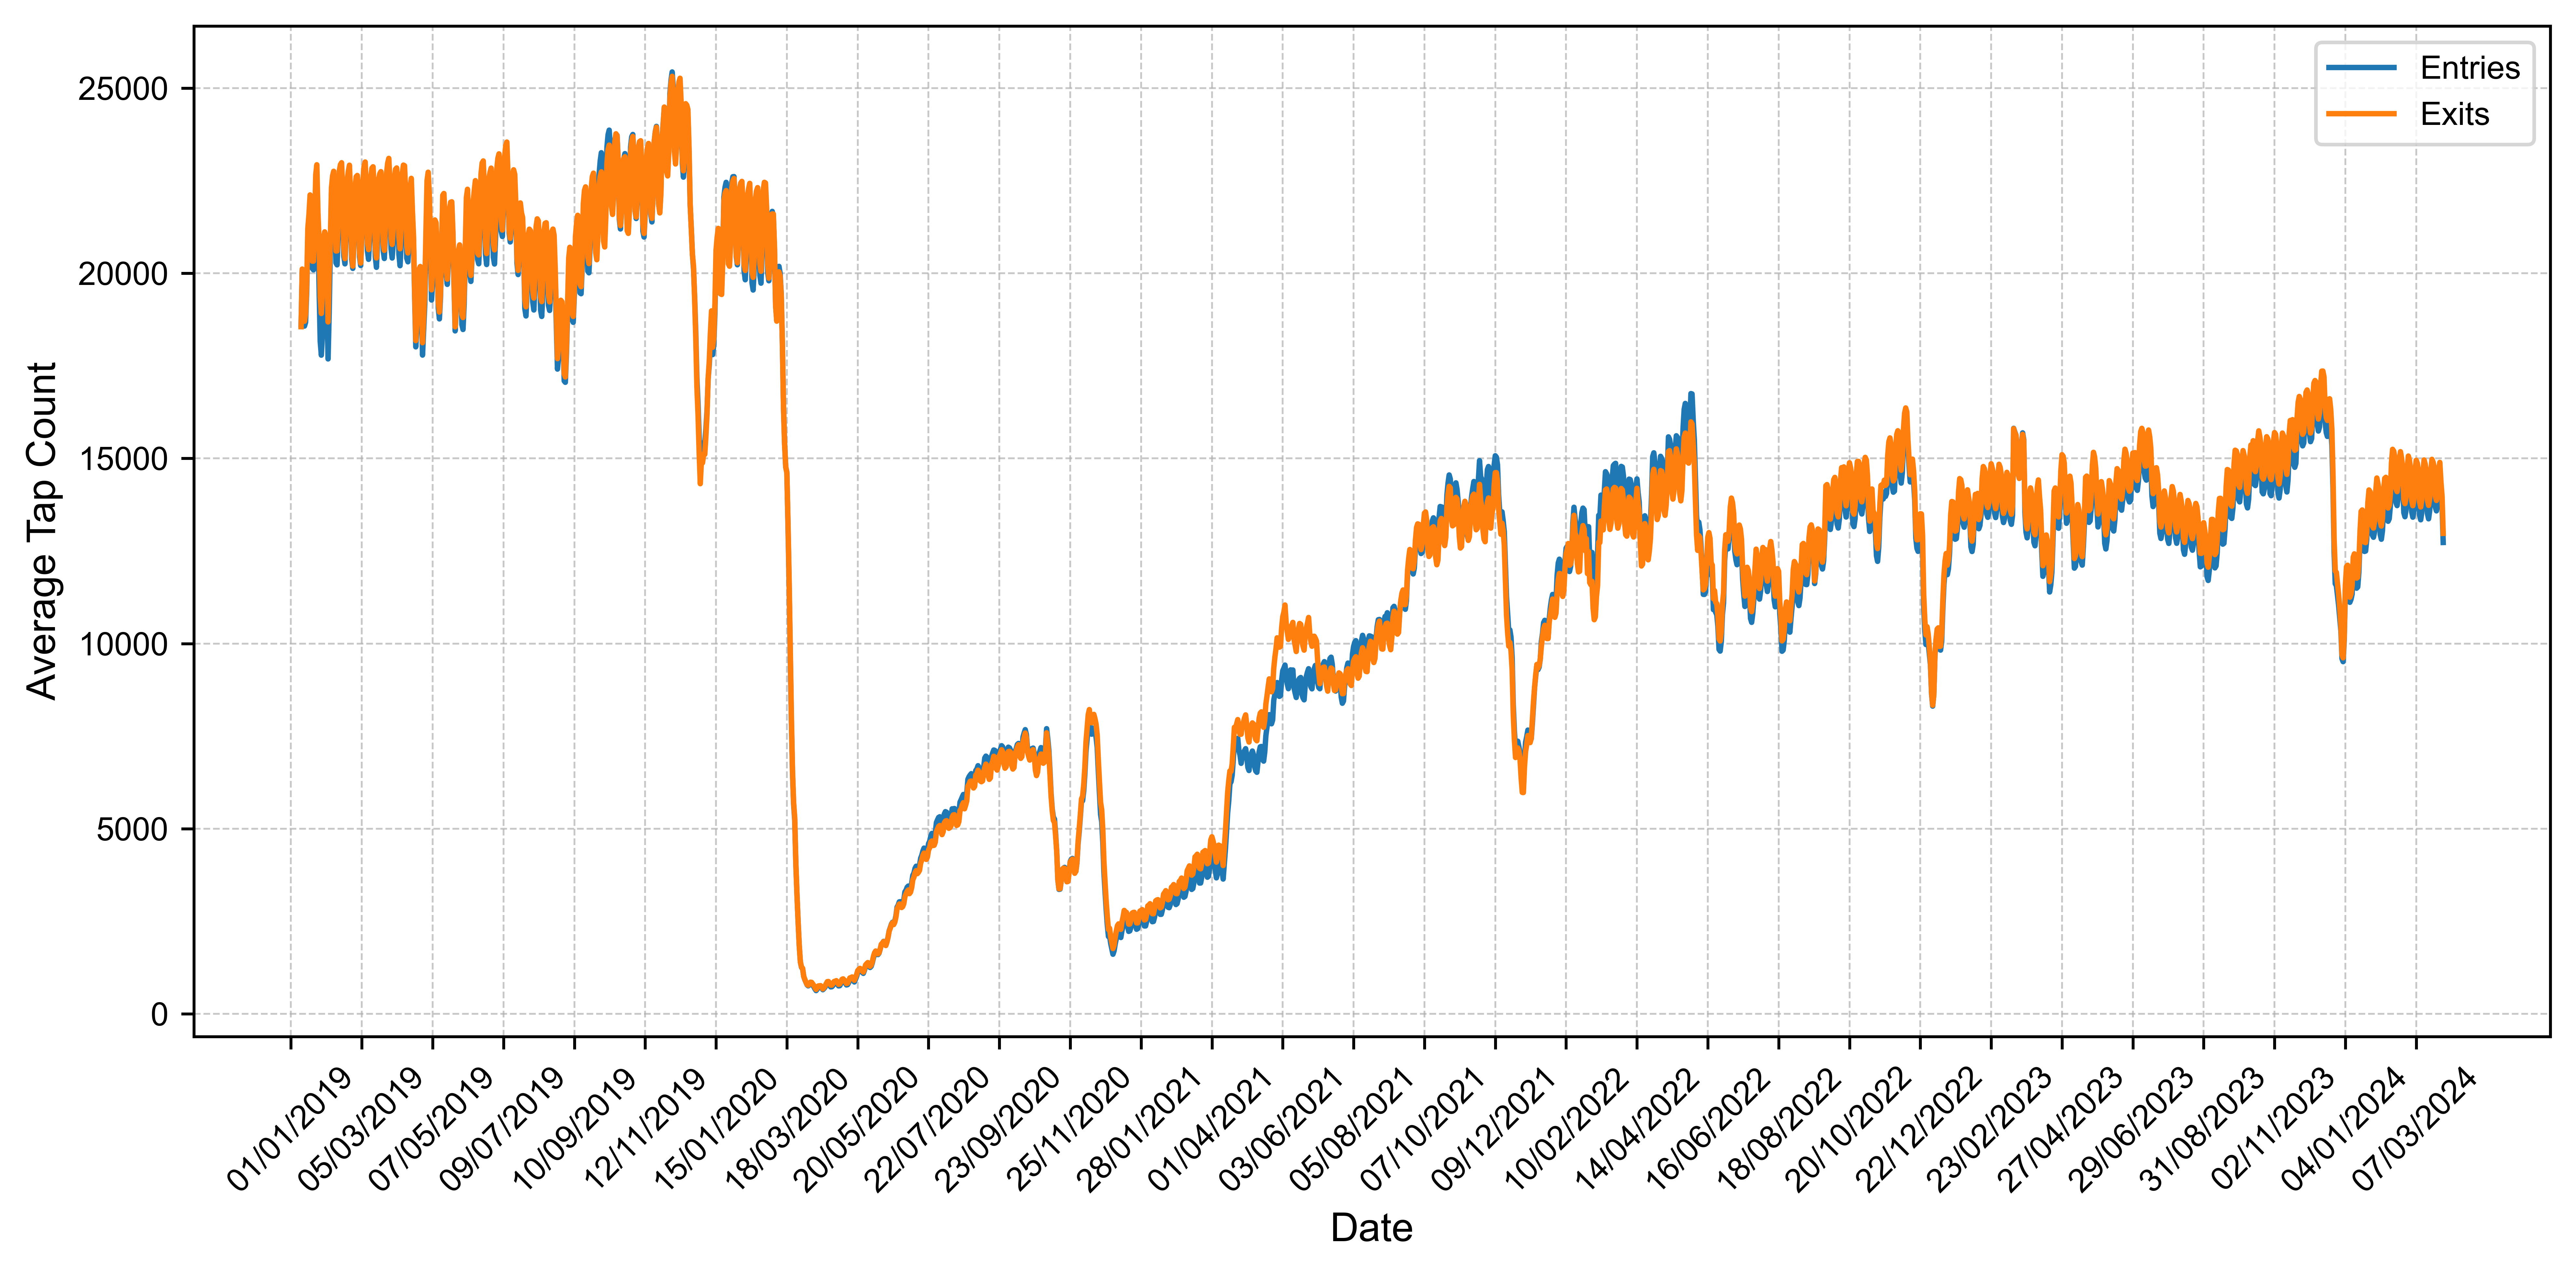

In [113]:
years = ['2019', '2020', '2021', '2022', '2023', '2024']

plt.figure(figsize=(10, 5), dpi=800)
plt.rcParams.update({
    'font.family': 'Arial',      # or 'serif'
    'font.size': 10,             # or 11, to match LaTeX
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})

avg_entries = taps.df[(taps.df['EntryExit'] == 'Entry')].groupby('TravelDate')['TapCount'].mean()
avg_exits = taps.df[(taps.df['EntryExit'] == 'Exit')].groupby('TravelDate')['TapCount'].mean()
avg_entries.sort_index(inplace=True, key = lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
avg_exits.sort_index(inplace=True, key = lambda x: pd.to_datetime(x, format='%d/%m/%Y'))


avg_entries = avg_entries.rolling(window=10).mean()
avg_exits = avg_exits.rolling(window=10).mean()


plt.plot(avg_entries, label='Entries')
plt.plot(avg_exits, label='Exits')
plt.xlabel('Date')
plt.ylabel('Average Tap Count')
n_label = 30
plt.xticks(ticks=range(0, len(avg_entries), len(avg_entries)//n_label), labels=avg_entries.index[::len(avg_entries)//n_label], rotation=45)
plt.tight_layout()  # avoid label clipping
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(f'plots/taps_evolution_{years[0]}_{years[-1]}.png')
plt.show()